In [14]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [11]:
data_confirmed = pd.read_csv(url_confirmed)
data_deaths = pd.read_csv(url_deaths)

In [9]:
data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,5.831288e+04,5.936989e+04,6.033058e+04,6.110163e+04,6.198372e+04,6.293235e+04,6.401938e+04,6.505984e+04,6.613522e+04,6.710467e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,3.029832e+05,3.091674e+05,3.148280e+05,3.191810e+05,3.235822e+05,3.290138e+05,3.354734e+05,3.415332e+05,3.475803e+05,3.528725e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.565000e+02,2.565000e+02,2.635000e+02,2.637500e+02,2.667500e+02,2.667500e+02,2.667500e+02,2.715000e+02,2.715000e+02,2.715000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.702000e+03,1.711500e+03,1.723000e+03,1.779000e+03,1.813000e+03,1.821500e+03,1.833000e+03,1.845000e+03,1.874500e+03,1.900000e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.545100e+04,1.601425e+04,1.635575e+04,1.643000e+04,1.682950e+04,1.702700e+04,1.723075e+04,1.771675e+04,1.838550e+04,1.912900e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,4.038816e+06,4.112531e+06,4.178970e+06,4.233923e+06,4.290337e+06,4.356206e+06,4.426982e+06,4.495015e+06,4.562038e+06,4.620444e+06


In [12]:
data_confirmed.drop(labels=['Province/State'], inplace= True, axis=1)
data_confirmed.drop(labels=['Lat'], inplace= True, axis=1)
data_confirmed.drop(labels=['Long'], inplace= True, axis=1)

data_deaths.drop(labels=['Province/State'], inplace= True, axis=1)
data_deaths.drop(labels=['Lat'], inplace= True, axis=1)
data_deaths.drop(labels=['Long'], inplace= True, axis=1)

In [13]:
data_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283
1,Albania,0,0,0,0,0,0,0,0,0,...,123,128,134,138,144,148,150,154,157,161
2,Algeria,0,0,0,0,0,0,0,0,0,...,1124,1136,1146,1155,1163,1174,1186,1200,1210,1223
3,Andorra,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,Angola,0,0,0,0,0,0,0,0,0,...,33,35,39,40,41,47,48,51,52,54


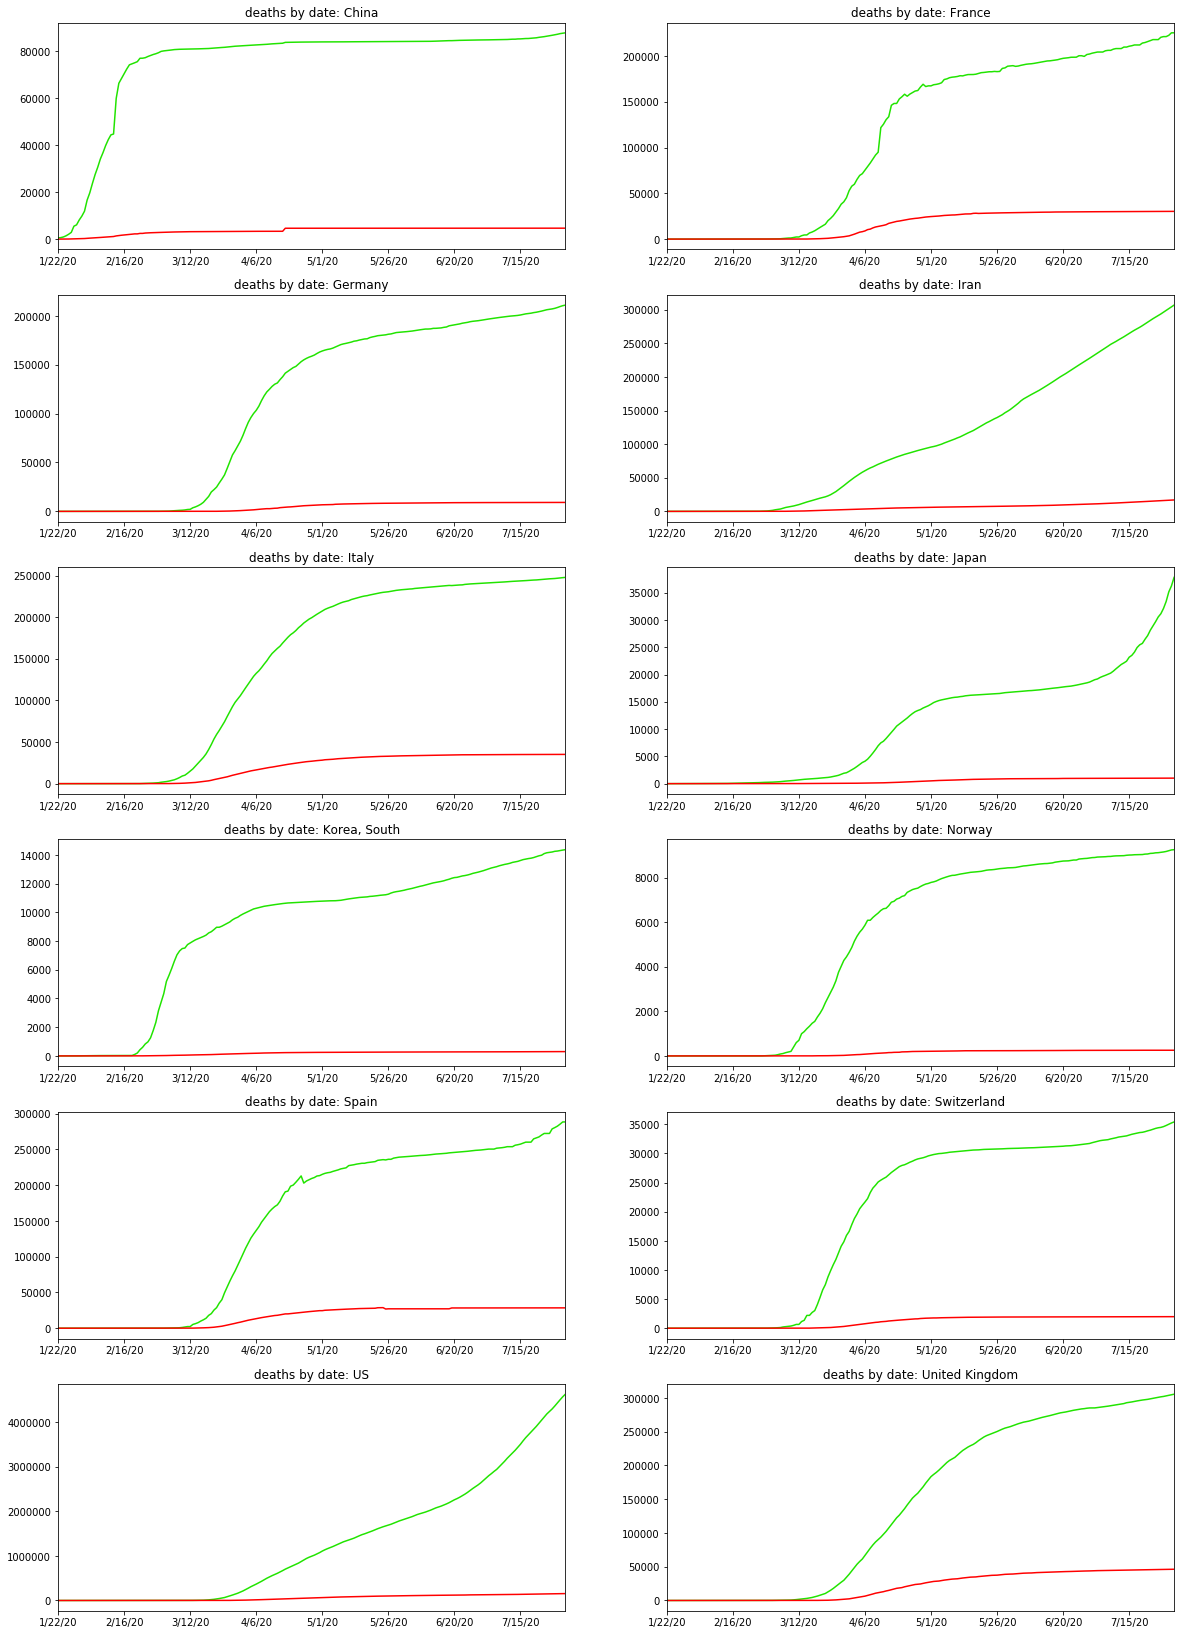

In [37]:
#Countrywise comparative plot (cases and death)
countries = sorted(data_confirmed['Country/Region'].unique())
rows = len(countries) // 2 + 1
i = 0
for country in (countries):
    country_data = data_confirmed[data_confirmed['Country/Region'] == country]
    country_data_deaths = data_deaths[data_deaths['Country/Region'] == country]
    # sum all the rows together for each column, and select only the data columns
    by_date = country_data.sum(axis=0).filter(like='/20')
    by_date_death = country_data_deaths.sum(axis=0).filter(like='/20')
    # plot it if numbers exceed specified amount on date
    if by_date['3/14/20'] > 1000 or by_date_death['3/14/20']>20:
        plt.subplot(rows, 2, i+1)
        by_date.plot(title='cases by date: %s' % country, color='#21e400', figsize=(20,5 * rows))
        by_date_death.plot(title='deaths by date: %s' % country, color='r', figsize=(20,5 * rows))
        i += 1

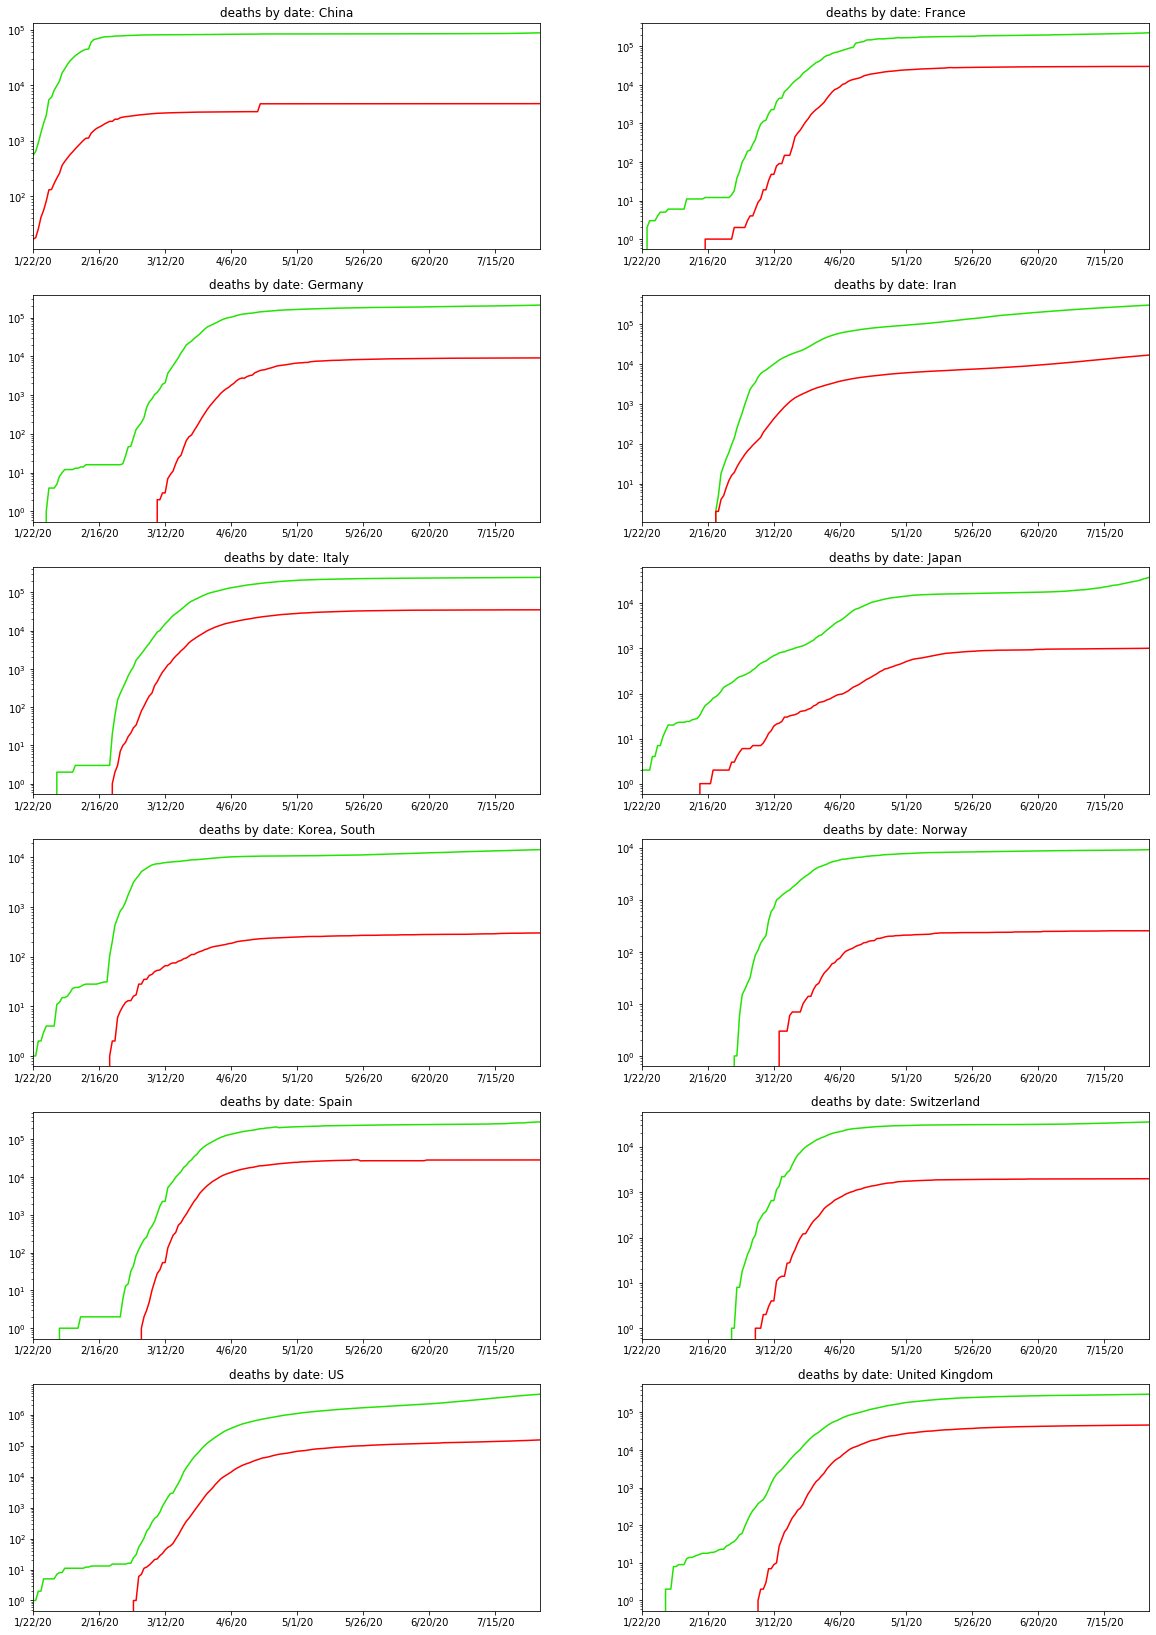

In [36]:
#Countrywise comparative logarithmic plot (cases and death)
countries = sorted(data_confirmed['Country/Region'].unique())
rows = len(countries) // 2 + 1
i = 0
for country in (countries):
    country_data = data_confirmed[data_confirmed['Country/Region'] == country]
    country_data_deaths = data_deaths[data_deaths['Country/Region'] == country]
    # sum all the rows together for each column, and select only the data columns
    by_date = country_data.sum(axis=0).filter(like='/20')
    by_date_death = country_data_deaths.sum(axis=0).filter(like='/20')
    # plot it if numbers exceed specified amount on date
    if by_date['3/14/20'] > 1000 or by_date_death['3/14/20']>20:
        plt.subplot(rows, 2, i+1)
        plt.yscale('log')
        by_date.plot(title='cases by date: %s' % country, color='#21e400', figsize=(20,5 * rows))
        by_date_death.plot(title='deaths by date: %s' % country, color='r', figsize=(20,5 * rows))
        i += 1